<a href="https://colab.research.google.com/github/gitdiren/AI-project/blob/main/Copy_of_Introduction_to_NN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the necessary libraries
import torch
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
import os
from torch.optim.lr_scheduler import StepLR
import time
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
import zipfile
#connecting the zip_file to Google Colab
drive.mount('/content/drive')
# 4.3 Demonstrate the use of image processing.
flower_photos_dg = zipfile.ZipFile('/content/drive/MyDrive/flower_photos 2.zip', 'r')
flower_photos_dg.extractall('/tmp')
flower_photos_dg.close()

train_datagen_dg = ImageDataGenerator(rescale=1./255)

train_set_dg = train_datagen_dg.flow_from_directory('/tmp/flower_photos',
                                                    class_mode='categorical',
                                                    classes=['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    color_mode='grayscale')
#printing the 5 classes with their indices and names
print(train_set_dg.class_indices)

torch.manual_seed(42)
#  4.2 Create a training script that utilizes the GPU
device_dg = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device_dg}")
 # 4.1 Demonstrate the use of pre-trained networks
model_dg = models.resnet50(pretrained=True)
num_of_features_dg = model_dg.fc.in_features

for param_dg in model_dg.parameters():
    param_dg.requires_grad = False

num_of_classes_dg = 5
model_dg.fc = torch.nn.Linear(num_of_features_dg, num_of_classes_dg)

model_dg.to(device_dg)
#4.4 Demonstrate data normalisation.
#4.5  Demonstrate data augmentation.
transform_dg = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

data_dir_dg = os.path.expanduser('/tmp/flower_photos')
dataset_dg = ImageFolder(root=data_dir_dg, transform=transform_dg)

train_size_dg = int(0.7 * len(dataset_dg))
val_size_dg = int(0.15 * len(dataset_dg))
test_size_dg = len(dataset_dg) - train_size_dg - val_size_dg
train_dataset_dg, val_dataset_dg, test_dataset_dg = random_split(dataset_dg, [train_size_dg, val_size_dg, test_size_dg])
#4.6   Demonstrate the use of data loading and data batching for training, validation and testing
train_loader_dg = DataLoader(train_dataset_dg, batch_size=32, shuffle=True)
val_loader_dg = DataLoader(val_dataset_dg, batch_size=32, shuffle=False)
test_loader_dg = DataLoader(test_dataset_dg, batch_size=32, shuffle=False)

loss_function_dg = torch.nn.CrossEntropyLoss()





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 3571 images belonging to 5 classes.
{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}
Using device: cuda


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 3.2 Demonstrate the use of a validation set for hyperparameter tuning.
learning_rates_dg = [0.1, 0.01, 0.001]
best_validation_accuracy_dg = 0
best_lrate_dg = None
# 3.1 Demonstrate ways to train neural networks.
for lr_dg in learning_rates_dg:
    print(f"Training with learning rate: {lr_dg}")

    optimizer_dg = torch.optim.Adam(model_dg.fc.parameters(), lr=lr_dg)
    scheduler_dg = StepLR(optimizer_dg, step_size=3, gamma=0.1)

    num_epochs_dg = 10
    for epoch_dg in range(num_epochs_dg):
        start_time_dg = time.time()
        model_dg.train()
        running_loss_dg = 0.0
        for x_dg, y_dg in train_loader_dg:
            x_dg, y_dg = x_dg.to(device_dg), y_dg.to(device_dg)

            optimizer_dg.zero_grad()
            y_pred_dg = model_dg(x_dg)
            loss_dg = loss_function_dg(y_pred_dg, y_dg)
            loss_dg.backward()
            optimizer_dg.step()

            running_loss_dg += loss_dg.item() * x_dg.size(0)

        scheduler_dg.step()

        epoch_loss_dg = running_loss_dg / len(train_loader_dg.dataset)
        print(f"Epoch {epoch_dg+1}/{num_epochs_dg}, Loss: {epoch_loss_dg:.4f}")

        model_dg.eval()
        validation_loss_dg = 0.0
        correct_dg = 0
        total_dg = 0
        with torch.no_grad():
            for x_dg, y_dg in val_loader_dg:
                x_dg, y_dg = x_dg.to(device_dg), y_dg.to(device_dg)
                y_pred_dg = model_dg(x_dg)
                loss_dg = loss_function_dg(y_pred_dg, y_dg)
                validation_loss_dg += loss_dg.item() * x_dg.size(0)

                _, predicted_dg = torch.max(y_pred_dg, 1)
                total_dg += y_dg.size(0)
                correct_dg += (predicted_dg == y_dg).sum().item()

        validation_loss_dg = validation_loss_dg / len(val_loader_dg.dataset)
        validation_accuracy_dg = correct_dg / total_dg
        print(f"Validation Loss: {validation_loss_dg:.4f}, Validation Accuracy: {validation_accuracy_dg:.4f}, Time: {time.time()-start_time_dg:.2f}s")

        if validation_accuracy_dg > best_validation_accuracy_dg:
            best_validation_accuracy_dg = validation_accuracy_dg
            best_lrate_dg = lr_dg

print(f"Best learning rate: {best_lrate_dg}, with Validation Accuracy: {best_validation_accuracy_dg:.4f}")


Training with learning rate: 0.1
Epoch 1/10, Loss: 17.5381
Validation Loss: 4.7616, Validation Accuracy: 0.7944, Time: 22.34s
Epoch 2/10, Loss: 4.3223
Validation Loss: 2.8057, Validation Accuracy: 0.8598, Time: 20.59s
Epoch 3/10, Loss: 5.4402
Validation Loss: 9.2282, Validation Accuracy: 0.7551, Time: 20.44s
Epoch 4/10, Loss: 2.7059
Validation Loss: 2.4463, Validation Accuracy: 0.8654, Time: 20.85s
Epoch 5/10, Loss: 1.8991
Validation Loss: 2.9704, Validation Accuracy: 0.8673, Time: 20.62s
Epoch 6/10, Loss: 1.8082
Validation Loss: 2.6175, Validation Accuracy: 0.8785, Time: 21.19s
Epoch 7/10, Loss: 1.6008
Validation Loss: 2.5910, Validation Accuracy: 0.8710, Time: 20.78s
Epoch 8/10, Loss: 1.4446
Validation Loss: 2.6854, Validation Accuracy: 0.8710, Time: 21.11s
Epoch 9/10, Loss: 1.3622
Validation Loss: 2.4197, Validation Accuracy: 0.8748, Time: 20.55s
Epoch 10/10, Loss: 1.5874
Validation Loss: 2.4873, Validation Accuracy: 0.8449, Time: 21.31s
Training with learning rate: 0.01
Epoch 1/10,

In [ ]:
#Final training of the model with the best learning rate
#Best learning rate is 0.001 as calculated above
optimizer_dg = torch.optim.Adam(model_dg.fc.parameters(), lr=0.001)
num_epochs_dg = 10
for epoch_dg in range(num_epochs_dg):
    model_dg.train()
    running_loss_dg = 0.0
    for x_dg, y_dg in train_loader_dg:
        x_dg, y_dg = x_dg.to(device_dg), y_dg.to(device_dg)

        optimizer_dg.zero_grad()
        y_pred_dg = model_dg(x_dg)
        loss_dg = loss_function_dg(y_pred_dg, y_dg)
        loss_dg.backward()
        optimizer_dg.step()

        running_loss_dg += loss_dg.item() * x_dg.size(0)

    epoch_loss_dg = running_loss_dg / len(train_loader_dg.dataset)
    print(f"Epoch {epoch_dg+1}/{num_epochs_dg}, Loss: {epoch_loss_dg:.4f}")


Epoch 1/10, Loss: 0.8639
Epoch 2/10, Loss: 0.4763
Epoch 3/10, Loss: 0.3976
Epoch 4/10, Loss: 0.3709
Epoch 5/10, Loss: 0.3485
Epoch 6/10, Loss: 0.3661
Epoch 7/10, Loss: 0.2992
Epoch 8/10, Loss: 0.2832
Epoch 9/10, Loss: 0.2891
Epoch 10/10, Loss: 0.2796


In [ ]:
model_dg.eval()
testing_loss_dg = 0.0
correct_dg = 0
total_dg = 0
with torch.no_grad():
    for x_dg, y_dg in test_loader_dg:
        x_dg, y_dg = x_dg.to(device_dg), y_dg.to(device_dg)
        y_pred_dg = model_dg(x_dg)
        loss_dg = loss_function_dg(y_pred_dg, y_dg)
        testing_loss_dg += loss_dg.item() * x_dg.size(0)

        _, predicted_dg = torch.max(y_pred_dg, 1)
        total_dg += y_dg.size(0)
        correct_dg += (predicted_dg == y_dg).sum().item()

testing_loss_dg = testing_loss_dg / len(test_loader_dg.dataset)
test_accuracy_dg = correct_dg / total_dg
print(f"Test Loss: {testing_loss_dg:.4f}, Test Accuracy: {test_accuracy_dg:.4f}")
# 4.7 Demonstrate how to save the model and load checkpoints
torch.save(model_dg.state_dict(), 'resnet50_transfer_learning_best_dg.pth')

Test Loss: 0.3428, Test Accuracy: 0.8752


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving 107592979_aaa9cdfe78_m.jpg to 107592979_aaa9cdfe78_m.jpg


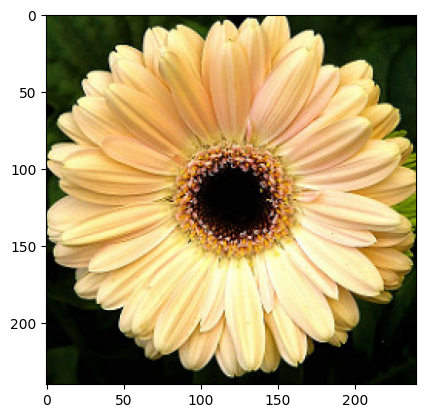

The predicted class is: daisy


In [ ]:
#3.3  Demonstrate how to use a neural network for inference.

from PIL import Image
import matplotlib.pyplot as plt
import torchvision.models as models
from google.colab import drive
from google.colab import files


# Loading the trained model
model_dg = models.resnet50(pretrained=True)
num_of_features_dg = model_dg.fc.in_features
model_dg.fc = torch.nn.Linear(num_of_features_dg, 5)
model_dg.load_state_dict(torch.load('/content/resnet50_transfer_learning_best_dg.pth'))
model_dg.eval()

# Transform the input image
transform_dg = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def predict_image(image_path_dg):
    image_dg = Image.open(image_path_dg).convert('RGB')
    plt.imshow(image_dg)
    plt.show()
    image_dg = transform_dg(image_dg).unsqueeze(0)

    with torch.no_grad():
        output_dg = model_dg(image_dg)
        _, predicted_dg = torch.max(output_dg, 1)

    class_names_dg = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
    return class_names_dg[predicted_dg.item()]

# Uploading an image
uploaded = files.upload()
image_path_dg = next(iter(uploaded.keys()))  # Getting the name of the uploaded file

# Predict the class of the uploaded image
prediction_dg = predict_image(image_path_dg)
print(f'The predicted class is: {prediction_dg}')